## Group 3 - Project 2
# Online Shopper Purchase Prediction

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

import model as Group3Models

import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier



In [2]:
#Read in CSV
online_shopping_df = pd.read_csv('online_shoppers_intention.csv')

online_shopping_df.info()

online_shopping_df["Revenue"].value_counts()

# online_shopping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [3]:
online_shopping_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Visualize PCA

In [4]:
pca_model = PCA(n_components=2)

<Axes: xlabel='OperatingSystems', ylabel='Count'>

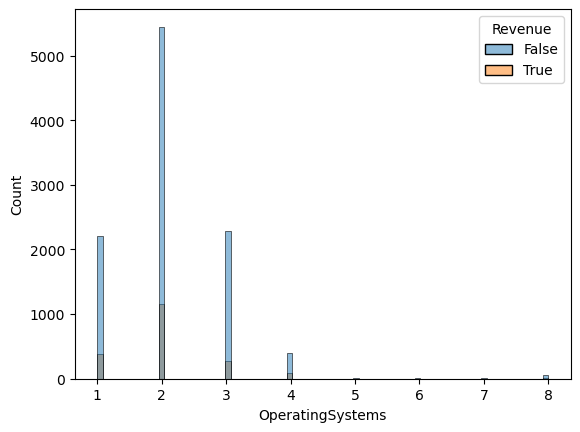

In [5]:
#EDA
sns.histplot(data=online_shopping_df, x='OperatingSystems', hue='Revenue')

<Axes: xlabel='ExitRates', ylabel='Count'>

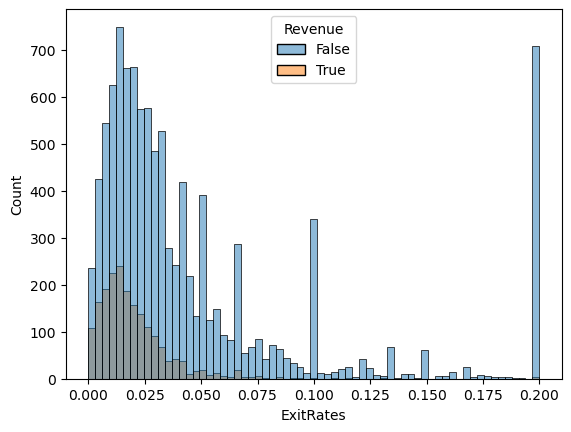

In [6]:
sns.histplot(data=online_shopping_df, x='ExitRates', hue='Revenue')

In [7]:
#Drop the target column, setup X and y datasets for train test split
X = online_shopping_df.drop('Revenue', axis=1)
y = online_shopping_df['Revenue']

X.head()

# Set seed for reproducibility
SEED = 42

#Train Test Split
X_test, X_train, y_test, y_train = train_test_split(X, y, random_state=SEED)
X_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000
mean,2.366850,80.126347,0.491729,33.930043,31.817386,1180.958901,0.023837,0.044397,5.865325,0.066429,2.135258,2.363283,3.115148,4.078171
std,3.418187,175.918464,1.261744,140.985844,43.649629,1833.520368,0.051252,0.050616,18.221658,0.207513,0.927725,1.737767,2.358117,4.025155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014210,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,578.200000,0.003595,0.026190,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,96.300000,0.000000,0.000000,39.000000,1428.416667,0.017647,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,24.000000,2657.318056,14.000000,2256.916667,517.000000,29970.465970,0.200000,0.200000,270.784693,1.000000,8.000000,13.000000,9.000000,20.000000


## Add Encodings to Feature Columns

In [8]:
#Encode VisitorType Column
ordinal_encoder = OrdinalEncoder()
X_train['VisitorType'] = ordinal_encoder.fit_transform(X_train[['VisitorType']])

#Ordinal Encode the Month Column
ordinal_encoder = OrdinalEncoder(categories=[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']])
X_train['Month'] = ordinal_encoder.fit_transform(X_train[['Month']])
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
8916,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,0.0,10.0,1,8,6,11,2.0,False
772,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,0.0,2.0,2,2,3,2,2.0,False
12250,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,0.0,10.0,2,2,2,2,2.0,False
7793,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,0.0,7.0,2,5,7,4,2.0,False
6601,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,0.0,7.0,2,2,3,1,2.0,True


In [9]:
#Encode VisitorType Column
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_test[['VisitorType']])
X_test['VisitorType'] = ordinal_encoder.transform(X_test[['VisitorType']])

#Ordinal Encode the Month Column
ordinal_encoder = OrdinalEncoder(categories=[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']])
X_test['Month'] = ordinal_encoder.fit_transform(X_test[['Month']])

<Axes: >

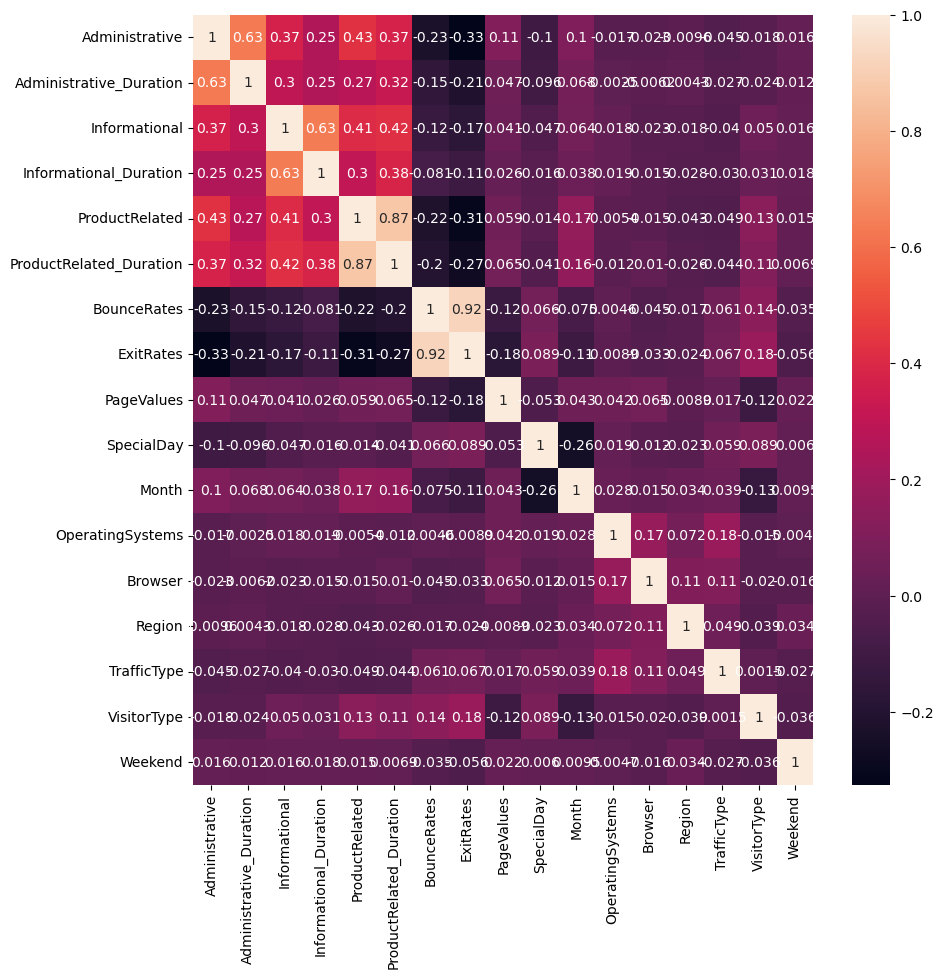

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=X_train.corr(), annot=True)

## Create a Model and predict

In [ ]:
#Create a Random Forest Classifier
model = Group3Models.model_don_model_V1(X_train, y_train)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)

AttributeError: module 'model' has no attribute 'model_don_model'

In [ ]:
# print(classification_report(y_test, y_pred))
Group3Models.evaluate_models(X_test, y_test)

Evaluation saved to model_evaluation.csv


Accuracy Score: 0.8915323888828809
Balanced Accuracy Score: 0.7536109781730749
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      7828
        True       0.68      0.55      0.61      1419

    accuracy                           0.89      9247
   macro avg       0.80      0.75      0.77      9247
weighted avg       0.88      0.89      0.89      9247



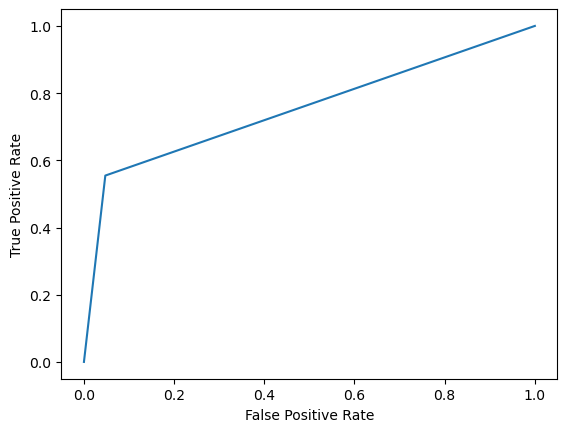

AUC Score: 0.7536109781730749


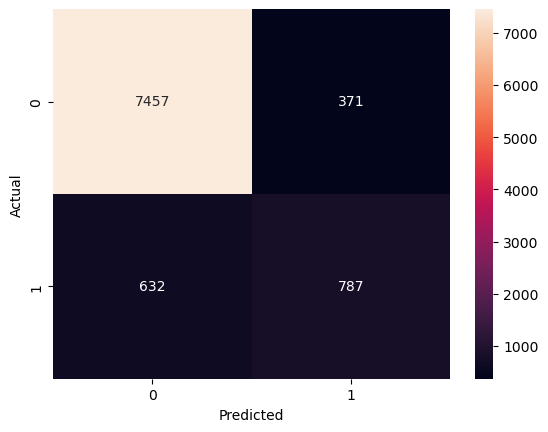

In [ ]:
model = Group3Models.XGBoost_V1()
model.fit(X_train, y_train)
Group3Models.evaluate_model(model, X_test, y_test)

c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.8853682275332541
Balanced Accuracy Score: 0.7597787779039339
              precision    recall  f1-score   support

       False       0.92      0.94      0.93      7828
        True       0.64      0.58      0.61      1419

    accuracy                           0.89      9247
   macro avg       0.78      0.76      0.77      9247
weighted avg       0.88      0.89      0.88      9247



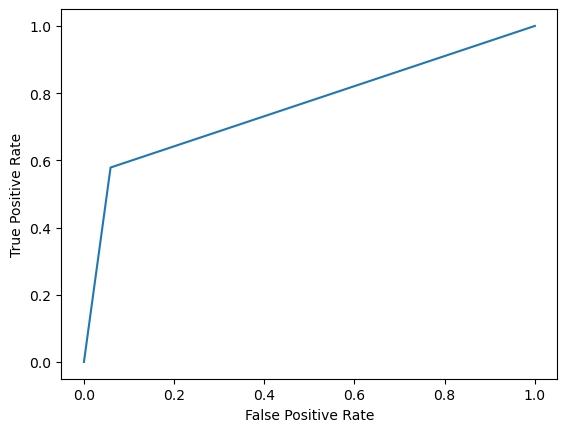

AUC Score: 0.7597787779039339


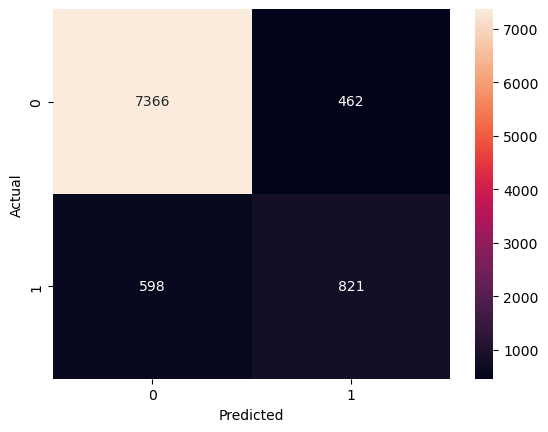

In [ ]:
model = Group3Models.ADABoost_V1()
model.fit(X_train, y_train)
Group3Models.evaluate_model(model, X_test, y_test)